We will use the Developer Job Satisfaction Dataset from StackOverflow 2025 Survey to find out if, well... money does bring happiness?

Jokes aside, your objective is to predict whether a developer is satisfied with their job based on their profile, experience, and tech stack.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Understanding our data


In [3]:
df = pd.read_csv('./data/survey_results_public.csv')
df.head()

/var/folders/d7/1mxt_jg524d9vgcmpm7h9lp80000gp/T/ipykernel_80769/4268320314.py:1: DtypeWarning: Columns (56,74,92,97,98,105,109,110,132,162,165) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('./data/survey_results_public.csv')


,ResponseId,MainBranch,Age,EdLevel,Employment,EmploymentAddl,WorkExp,LearnCodeChoose,LearnCode,LearnCodeAI,...,AIAgentOrchestration,AIAgentOrchWrite,AIAgentObserveSecure,AIAgentObsWrite,AIAgentExternal,AIAgentExtWrite,AIHuman,AIOpen,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,25-34 years old,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Employed,"Caring for dependents (children, elderly, etc.)",8.0,"Yes, I am not new to coding but am learning ne...",Online Courses or Certification (includes all ...,"Yes, I learned how to use AI-enabled tools for...",...,Vertex AI,NaN,NaN,NaN,ChatGPT,NaN,When I don’t trust AI’s answers,"Troubleshooting, profiling, debugging",61256.0,10.0
1,2,I am a developer by profession,25-34 years old,"Associate degree (A.A., A.S., etc.)",Employed,NaN,2.0,"Yes, I am not new to coding but am learning ne...",Online Courses or Certification (includes all ...,"Yes, I learned how to use AI-enabled tools for...",...,NaN,NaN,NaN,NaN,NaN,NaN,When I don’t trust AI’s answers;When I want to...,All skills. AI is a flop.,104413.0,9.0
2,3,I am a developer by profession,35-44 years old,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Independent contractor, freelancer, or self-em...",None of the above,10.0,"Yes, I am not new to coding but am learning ne...",Online Courses or Certification (includes all ...,"Yes, I learned how to use AI-enabled tools for...",...,NaN,NaN,NaN,NaN,ChatGPT;Claude Code;GitHub Copilot;Google Gemini,NaN,When I don’t trust AI’s answers;When I want to...,"Understand how things actually work, problem s...",53061.0,8.0
3,4,I am a developer by profession,35-44 years old,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed,None of the above,4.0,"Yes, I am not new to coding but am learning ne...","Other online resources (e.g. standard search, ...","Yes, I learned how to use AI-enabled tools for...",...,NaN,NaN,NaN,NaN,ChatGPT;Claude Code,NaN,When I don’t trust AI’s answers;When I want to...,NaN,36197.0,6.0
4,5,I am a developer by profession,35-44 years old,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Independent contractor, freelancer, or self-em...","Caring for dependents (children, elderly, etc.)",21.0,"No, I am not new to coding and did not learn n...",NaN,"Yes, I learned how to use AI-enabled tools for...",...,NaN,NaN,NaN,NaN,NaN,NaN,When I don’t trust AI’s answers,"critical thinking, the skill to define the tas...",60000.0,7.0


In [4]:
df.shape

(49191, 172)

We will have two models: 

One, where our target is a rate in a scale of 0 - 10 of the satisfaction with the current job. We will made an classificator over that rate. 

In [5]:
df['JobSat'].value_counts().sort_index()


JobSat
0.0      242
1.0      165
2.0      439
3.0      811
4.0      803
5.0     1896
6.0     3230
7.0     5590
8.0     6972
9.0     3598
10.0    2924
Name: count, dtype: int64

Other, is a regression where we will try to predict the current salary based on job descriptions and user profile!

In [6]:
df['ConvertedCompYearly'].dropna().describe()

count    2.394700e+04
mean     1.017615e+05
std      4.617569e+05
min      1.000000e+00
25%      3.817100e+04
50%      7.532000e+04
75%      1.205960e+05
max      5.000000e+07
Name: ConvertedCompYearly, dtype: float64

In [7]:
df['ConvertedCompYearly'].head(10)

0     61256.0
1    104413.0
2     53061.0
3     36197.0
4     60000.0
5    120000.0
6      6240.0
7     72000.0
8     70000.0
9      5400.0
Name: ConvertedCompYearly, dtype: float64

## Classificator: are you happy with your job?

### Understanding our data

#### Pre-processing:

In [8]:
df_ml = df[df['JobSat'].notna()].copy()
df_ml['target'] = df_ml['JobSat'].astype(int)
df_ml = df_ml.drop(columns=['JobSat'])

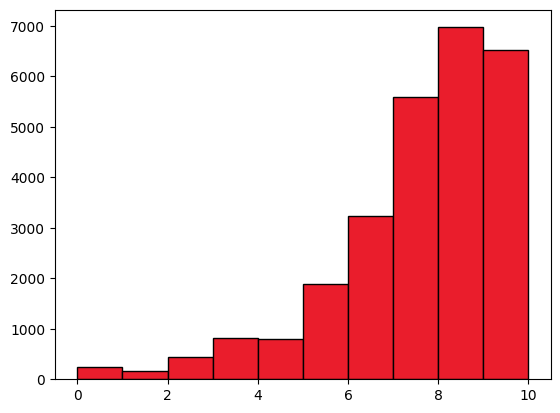

In [9]:
plt.hist(df_ml['target'], bins=10,color='#ea1d2cff',edgecolor='black')
plt.show()

Seems to have a gap between 7-8. This is where we will initially draw the line on the classes - if someone is satisfied with their rote, they must have rated 7 or more. 

In [57]:
df_ml = df[df['JobSat'].notna()].copy()

df_ml['target'] = (df_ml['JobSat'] >= 7).astype(int)
df_ml = df_ml.drop(columns=['JobSat'])

In [58]:
df_ml.isna().sum()

ResponseId                 0
MainBranch                 0
Age                        0
EdLevel                   24
Employment                 0
                       ...  
AIAgentExtWrite        25985
AIHuman                 4820
AIOpen                  9588
ConvertedCompYearly     7221
target                     0
Length: 172, dtype: int64

In [59]:
df_ml.fillna(0)

,ResponseId,MainBranch,Age,EdLevel,Employment,EmploymentAddl,WorkExp,LearnCodeChoose,LearnCode,LearnCodeAI,...,AIAgentOrchestration,AIAgentOrchWrite,AIAgentObserveSecure,AIAgentObsWrite,AIAgentExternal,AIAgentExtWrite,AIHuman,AIOpen,ConvertedCompYearly,target
0,1,I am a developer by profession,25-34 years old,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Employed,"Caring for dependents (children, elderly, etc.)",8.0,"Yes, I am not new to coding but am learning ne...",Online Courses or Certification (includes all ...,"Yes, I learned how to use AI-enabled tools for...",...,Vertex AI,0,0,0,ChatGPT,0,When I don’t trust AI’s answers,"Troubleshooting, profiling, debugging",61256.0,1
1,2,I am a developer by profession,25-34 years old,"Associate degree (A.A., A.S., etc.)",Employed,0,2.0,"Yes, I am not new to coding but am learning ne...",Online Courses or Certification (includes all ...,"Yes, I learned how to use AI-enabled tools for...",...,0,0,0,0,0,0,When I don’t trust AI’s answers;When I want to...,All skills. AI is a flop.,104413.0,1
2,3,I am a developer by profession,35-44 years old,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Independent contractor, freelancer, or self-em...",None of the above,10.0,"Yes, I am not new to coding but am learning ne...",Online Courses or Certification (includes all ...,"Yes, I learned how to use AI-enabled tools for...",...,0,0,0,0,ChatGPT;Claude Code;GitHub Copilot;Google Gemini,0,When I don’t trust AI’s answers;When I want to...,"Understand how things actually work, problem s...",53061.0,1
3,4,I am a developer by profession,35-44 years old,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed,None of the above,4.0,"Yes, I am not new to coding but am learning ne...","Other online resources (e.g. standard search, ...","Yes, I learned how to use AI-enabled tools for...",...,0,0,0,0,ChatGPT;Claude Code,0,When I don’t trust AI’s answers;When I want to...,0,36197.0,0
4,5,I am a developer by profession,35-44 years old,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Independent contractor, freelancer, or self-em...","Caring for dependents (children, elderly, etc.)",21.0,"No, I am not new to coding and did not learn n...",0,"Yes, I learned how to use AI-enabled tools for...",...,0,0,0,0,0,0,When I don’t trust AI’s answers,"critical thinking, the skill to define the tas...",60000.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49176,49177,I am a developer by profession,25-34 years old,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed,Attending school (part-time),5.0,"Yes, I am not new to coding but am learning ne...",Online Courses or Certification (includes all ...,"Yes, I learned how to use AI-enabled tools req...",...,0,0,0,0,0,0,0,0,0.0,1
49178,49179,I am a developer by profession,45-54 years old,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed,0,20.0,"No, I am not new to coding and did not learn n...",0,"Yes, I learned how to use AI-enabled tools for...",...,0,0,0,0,0,0,When I don’t trust AI’s answers;When I want to...,0,0.0,1
49179,49180,I am a developer by profession,25-34 years old,"Associate degree (A.A., A.S., etc.)",Employed,Attending school (part-time),5.0,"Yes, I am not new to coding but am learning ne...","Other online resources (e.g. standard search, ...","No, I didn't spend time learning in the past year",...,0,0,0,0,0,0,When I don’t trust AI’s answers;When I want to...,0,0.0,1
49180,49181,I am a developer by profession,18-24 years old,"Secondary school (e.g. American high school, G...",Student,Engaged in paid work (20-29 hours per week),1.0,"Yes, I am not new to coding but am learning ne...","Other online resources (e.g. standard search, ...","No, I didn't spend time learning in the past year",...,0,0,0,0,0,0,When I want to fully understand something;When...,0,0.0,1


In [60]:
df_ml.dtypes

ResponseId               int64
MainBranch              object
Age                     object
EdLevel                 object
Employment              object
                        ...   
AIAgentExtWrite         object
AIHuman                 object
AIOpen                  object
ConvertedCompYearly    float64
target                   int64
Length: 172, dtype: object

We will need to perform some one-hot enconding as we are dealing with a lot of features in our data! We will doing avoiding the dummy variable trap by dropping one category because the dropped category is implied when all other categories are 0.

In [61]:
categorical_cols = [col for col in df_ml.columns if df_ml[col].dtype == 'object']

In [62]:
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.preprocessing import LabelEncoder

df_temp = df_ml.copy()
target = df_ml['target']

for col in categorical_cols:
    le = LabelEncoder()
    df_temp[col] = le.fit_transform(df_temp[col].astype(str))

<Axes: >

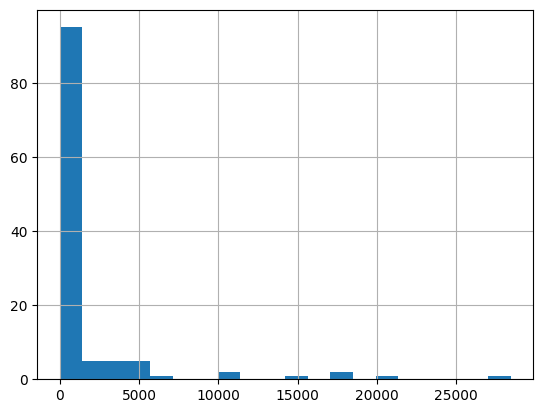

In [63]:

chi2_selector = SelectKBest(chi2, k='all')
chi2_selector.fit(df_temp[categorical_cols], target)

chi2_scores = (pd.DataFrame({'feature': categorical_cols,
                             'chi2_score': chi2_selector.scores_}
                           ).sort_values('chi2_score', ascending=False))

chi2_scores['chi2_score'].hist(bins=20)

In [64]:
chi2_scores['chi2_score'].describe()

count      118.000000
mean      1638.167291
std       4406.131447
min          0.000464
25%          4.643403
50%         56.316058
75%        522.124753
max      28462.013216
Name: chi2_score, dtype: float64

In [65]:
selected_categorical = chi2_scores[chi2_scores['chi2_score'] > 20000]['feature'].tolist()
len(selected_categorical)

2

In [66]:
df_ml[selected_categorical].nunique()

LanguageHaveWorkedWith    11664
AIOpen                    15423
dtype: int64

In [67]:
df_ml['LanguageHaveWorkedWith'].value_counts().head(10)

LanguageHaveWorkedWith
HTML/CSS;JavaScript;TypeScript                                       333
C#;HTML/CSS;JavaScript;SQL;TypeScript                                183
C#;HTML/CSS;JavaScript;PowerShell;SQL;TypeScript                     152
C#;HTML/CSS;JavaScript;SQL                                           152
HTML/CSS;JavaScript;PHP;SQL                                          149
HTML/CSS;JavaScript;PHP;SQL;TypeScript                               130
Bash/Shell (all shells);HTML/CSS;JavaScript;Python;SQL;TypeScript    126
C#                                                                   123
Python;SQL                                                           114
HTML/CSS;JavaScript;SQL;TypeScript                                   107
Name: count, dtype: int64

In [68]:
all_languages = df_ml['LanguageHaveWorkedWith'].dropna().str.split(';').explode()
language_counts = all_languages.value_counts()

language_counts.head(20)

LanguageHaveWorkedWith
JavaScript                 16365
HTML/CSS                   15001
SQL                        14583
Python                     12996
TypeScript                 11609
Bash/Shell (all shells)    11568
C#                          7106
Java                        7014
PowerShell                  5476
C++                         5127
PHP                         4561
C                           4497
Go                          4119
Rust                        3381
Kotlin                      2741
Lua                         1973
Ruby                        1599
Dart                        1445
Swift                       1337
Assembly                    1330
Name: count, dtype: int64

In [69]:
top_20_languages = language_counts.head(20).index.tolist()

for i in top_20_languages:
    df_ml[f'lang_{i}'] = df_ml['LanguageHaveWorkedWith'].fillna('').str.contains(i, regex=False).astype(int)

df_ml.head(2)

,ResponseId,MainBranch,Age,EdLevel,Employment,EmploymentAddl,WorkExp,LearnCodeChoose,LearnCode,LearnCodeAI,...,lang_PHP,lang_C,lang_Go,lang_Rust,lang_Kotlin,lang_Lua,lang_Ruby,lang_Dart,lang_Swift,lang_Assembly
0,1,I am a developer by profession,25-34 years old,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Employed,"Caring for dependents (children, elderly, etc.)",8.0,"Yes, I am not new to coding but am learning ne...",Online Courses or Certification (includes all ...,"Yes, I learned how to use AI-enabled tools for...",...,0,0,0,0,0,0,0,1,0,0
1,2,I am a developer by profession,25-34 years old,"Associate degree (A.A., A.S., etc.)",Employed,NaN,2.0,"Yes, I am not new to coding but am learning ne...",Online Courses or Certification (includes all ...,"Yes, I learned how to use AI-enabled tools for...",...,0,0,0,0,0,0,0,0,0,0


In [70]:
for col in [col for col in df_ml.columns if col.startswith('lang_')]:
    print(f"{col}: {df_ml[col].sum():,} users ({df_ml[col].mean():.1%})")

lang_JavaScript: 16,365 users (61.4%)
lang_HTML/CSS: 15,001 users (56.2%)
lang_SQL: 14,583 users (54.7%)
lang_Python: 13,024 users (48.8%)
lang_TypeScript: 11,609 users (43.5%)
lang_Bash/Shell (all shells): 11,568 users (43.4%)
lang_C#: 7,106 users (26.6%)
lang_Java: 18,239 users (68.4%)
lang_PowerShell: 5,476 users (20.5%)
lang_C++: 5,127 users (19.2%)
lang_PHP: 4,561 users (17.1%)
lang_C: 19,284 users (72.3%)
lang_Go: 4,119 users (15.4%)
lang_Rust: 3,381 users (12.7%)
lang_Kotlin: 2,741 users (10.3%)
lang_Lua: 1,973 users (7.4%)
lang_Ruby: 1,599 users (6.0%)
lang_Dart: 1,445 users (5.4%)
lang_Swift: 1,337 users (5.0%)
lang_Assembly: 1,330 users (5.0%)


In [71]:
df_ml.columns.tolist()

['ResponseId',
 'MainBranch',
 'Age',
 'EdLevel',
 'Employment',
 'EmploymentAddl',
 'WorkExp',
 'LearnCodeChoose',
 'LearnCode',
 'LearnCodeAI',
 'AILearnHow',
 'YearsCode',
 'DevType',
 'OrgSize',
 'ICorPM',
 'RemoteWork',
 'PurchaseInfluence',
 'TechEndorseIntro',
 'TechEndorse_1',
 'TechEndorse_2',
 'TechEndorse_3',
 'TechEndorse_4',
 'TechEndorse_5',
 'TechEndorse_6',
 'TechEndorse_7',
 'TechEndorse_8',
 'TechEndorse_9',
 'TechEndorse_13',
 'TechEndorse_13_TEXT',
 'TechOppose_1',
 'TechOppose_2',
 'TechOppose_3',
 'TechOppose_5',
 'TechOppose_7',
 'TechOppose_9',
 'TechOppose_11',
 'TechOppose_13',
 'TechOppose_16',
 'TechOppose_15',
 'TechOppose_15_TEXT',
 'Industry',
 'JobSatPoints_1',
 'JobSatPoints_2',
 'JobSatPoints_3',
 'JobSatPoints_4',
 'JobSatPoints_5',
 'JobSatPoints_6',
 'JobSatPoints_7',
 'JobSatPoints_8',
 'JobSatPoints_9',
 'JobSatPoints_10',
 'JobSatPoints_11',
 'JobSatPoints_13',
 'JobSatPoints_14',
 'JobSatPoints_15',
 'JobSatPoints_16',
 'JobSatPoints_15_TEXT',
 

## First try

In [72]:
lang_columns = [col for col in df_ml.columns if col.startswith('lang_')]
df_ml_1 = df_ml[lang_columns + ['ConvertedCompYearly','target']].copy()

In [73]:
df_ml_1['ConvertedCompYearly'].isna().sum()

np.int64(7221)

In [74]:
df_ml_1['has_salary'] = df_ml_1['ConvertedCompYearly'].notna().astype(int)
df_ml_1 = df_ml_1.fillna(0)

In [75]:
y = df_ml_1['target']
X = df_ml_1.drop('target', axis=1)

In [76]:
correlations = df_ml_1[X.columns].corrwith(df_ml_1['target']).abs().sort_values(ascending=False)
print(correlations)

lang_Bash/Shell (all shells)    0.024215
ConvertedCompYearly             0.020323
lang_PowerShell                 0.016376
lang_Ruby                       0.013940
lang_SQL                        0.013687
lang_C                          0.013211
lang_HTML/CSS                   0.012544
lang_C#                         0.012450
lang_Swift                      0.011158
lang_JavaScript                 0.009533
lang_Assembly                   0.009280
lang_Lua                        0.007875
lang_Dart                       0.006970
lang_Kotlin                     0.006746
has_salary                      0.006558
lang_Python                     0.006075
lang_Java                       0.004985
lang_C++                        0.004075
lang_TypeScript                 0.003195
lang_Go                         0.002620
lang_Rust                       0.002575
lang_PHP                        0.001252
dtype: float64


In [77]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Training model


In [78]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

rf = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=50, class_weight='balanced', random_state=42)

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
print(f"Test Accuracy: {accuracy_score(y_test, y_pred):.3f}")
print(f"\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print(f"\nClassification Report:")
print(classification_report(y_test, y_pred))


Test Accuracy: 0.547

Confusion Matrix:
[[ 730  718]
 [1697 2189]]

Classification Report:
              precision    recall  f1-score   support

           0       0.30      0.50      0.38      1448
           1       0.75      0.56      0.64      3886

    accuracy                           0.55      5334
   macro avg       0.53      0.53      0.51      5334
weighted avg       0.63      0.55      0.57      5334



In [79]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(rf, X, y, cv=cv, scoring='accuracy')

print(f"CV Accuracy: {scores.mean():.3f} (+/- {scores.std():.3f})")


CV Accuracy: 0.560 (+/- 0.007)


## Let's improve our model

Let's add another features, standartize our features and check for multicollinearity.

In [ ]:
numerical_cols = [col for col in df_ml.columns if df_ml[col].dtype in ['int64', 'float64'] and col not in ['target', 'ResponseId']]
correlations = df_ml[numerical_cols + ['target']].dropna().corr()['target'].abs().sort_values(ascending=False)

correlations = correlations.drop('target')
print(correlations.head(20))

Top 20 features correlated with target:
WorkExp                0.080306
YearsCode              0.074500
JobSatPoints_4         0.069495
JobSatPoints_2         0.060304
JobSatPoints_11        0.054850
JobSatPoints_9         0.054615
JobSatPoints_7         0.031348
TechEndorse_1          0.029537
TechEndorse_2          0.026820
TechEndorse_8          0.026333
lang_Ruby              0.022744
SO_Actions_5           0.022448
SO_Actions_15          0.022208
JobSatPoints_10        0.021409
SO_Actions_3           0.020986
ConvertedCompYearly    0.020293
SO_Actions_6           0.020037
lang_Dart              0.019357
SO_Actions_9           0.019217
TechEndorse_6          0.018589
Name: target, dtype: float64


In [88]:
ai_responses = df_ml['AIOpen'].dropna().str.split(';').explode()
ai_responses = ai_responses.value_counts()

ai_responses.head(20)

AIOpen
Problem solving          108
Critical thinking         76
problem solving           67
Debugging                 64
Communication             45
All of them               42
Creativity                38
Thinking                  34
critical thinking         34
Architecture              31
debugging                 30
thinking                  29
yes                       27
creativity                26
All of them.              25
All                       25
Software architecture     24
Everything                23
Yes                       23
Problem Solving           22
Name: count, dtype: int64

In [89]:
ai_responses = df_ml['AIOpen'].dropna().str.lower().str.strip()  
ai_responses = ai_responses.value_counts()

ai_responses.head(5)

AIOpen
problem solving      192
critical thinking    110
debugging             92
thinking              63
creativity            63
Name: count, dtype: int64

In [91]:
top_5_ai_skills = ai_responses.head(5).index.tolist()

for skill in top_5_ai_skills:
    clean_name = skill.replace(' ', '_')
    df_ml[f'ai_skill_{clean_name}'] = df_ml['AIOpen'].fillna('').str.lower().str.contains(skill, regex=False).astype(int)

In [93]:
lang_columns = [col for col in df_ml.columns if col.startswith('lang_')]
ai_skills_columns = [col for col in df_ml.columns if col.startswith('ai_skill_')]

df_ml_2 = df_ml[lang_columns + ai_skills_columns + ['ConvertedCompYearly','target','WorkExp','YearsCode','JobSatPoints_4']].copy()

In [94]:
df_ml_2['has_salary'] = df_ml_2['ConvertedCompYearly'].notna().astype(int)
df_ml_2 = df_ml_2.fillna(0)

In [107]:
pairplot_top10 = df_ml_2.corr()['target'].abs().sort_values(ascending=False).head(10).index.tolist()
pairplot_top10

['target',
 'WorkExp',
 'YearsCode',
 'JobSatPoints_4',
 'lang_Bash/Shell (all shells)',
 'ConvertedCompYearly',
 'lang_PowerShell',
 'lang_Ruby',
 'lang_SQL',
 'lang_C']

In [135]:
from sklearn.preprocessing import StandardScaler

numeric_cols = ['ConvertedCompYearly', 'WorkExp', 'YearsCode', 'JobSatPoints_4']
scaler = StandardScaler()

df_ml_2[numeric_cols] = scaler.fit_transform(df_ml_2[numeric_cols])

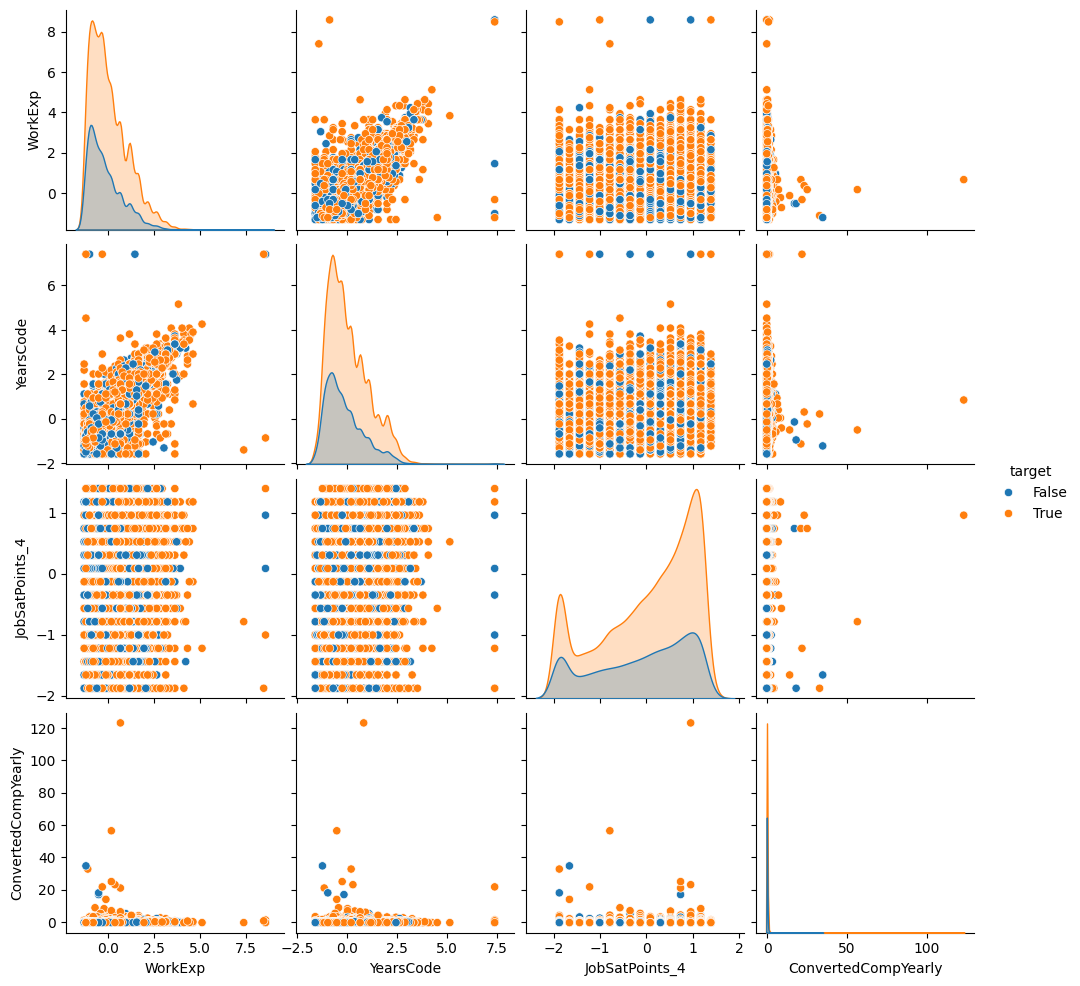

In [136]:
import seaborn as sns

sns.pairplot(df_ml_2[['WorkExp','YearsCode','JobSatPoints_4','ConvertedCompYearly','target']],hue='target') 

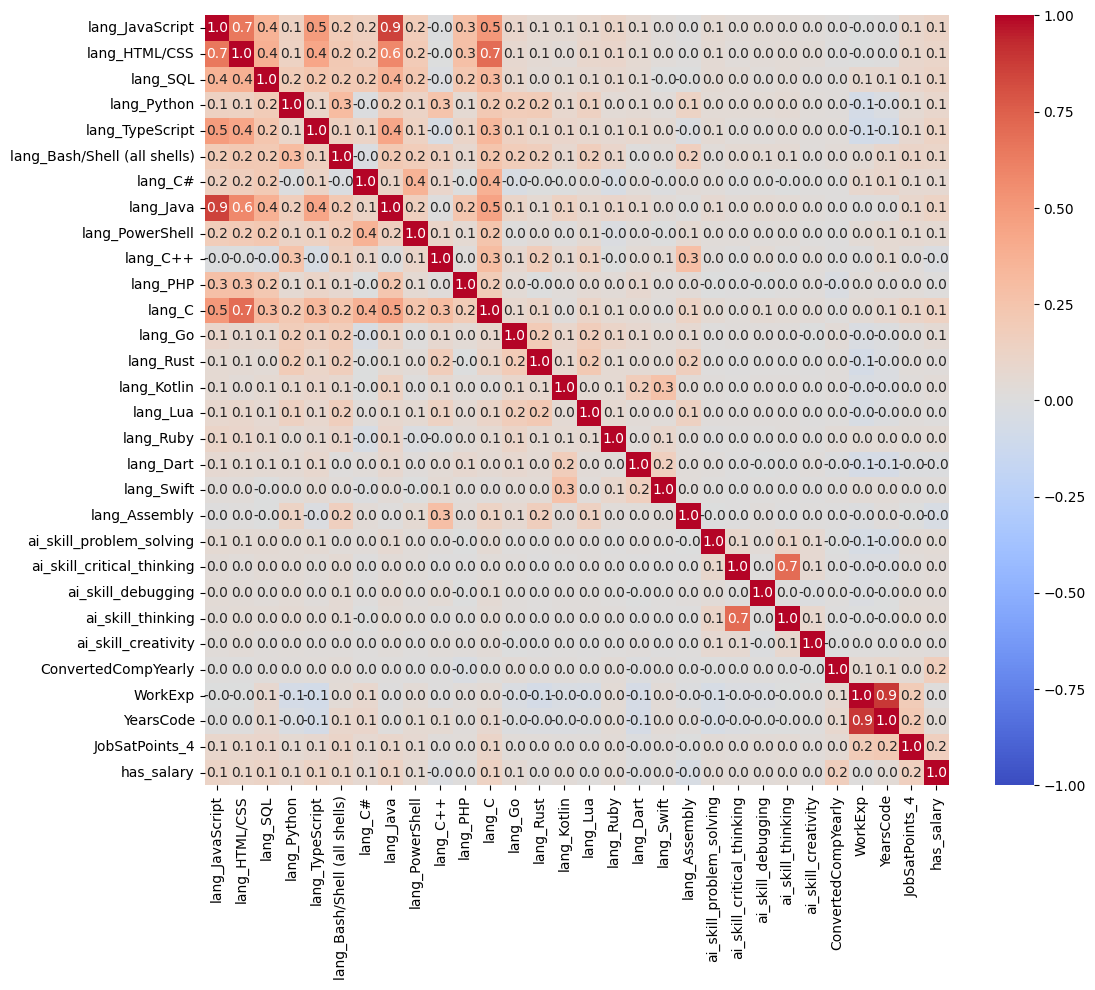

In [166]:
corr_matrix = df_ml_2.drop('target', axis=1).corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.1f', cmap='coolwarm', center=0, vmin=-1, vmax=1)
plt.show()

In [168]:
y = df_ml_2['target']
X = df_ml_2.drop(['target', 'YearsCode', 'ai_skill_thinking', 'ai_skill_critical_thinking'], axis=1)

In [169]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [170]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

rf = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=50, class_weight='balanced', random_state=42)

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
print(f"Test Accuracy: {accuracy_score(y_test, y_pred):.3f}")
print(f"\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print(f"\nClassification Report:")
print(classification_report(y_test, y_pred))

Test Accuracy: 0.567

Confusion Matrix:
[[ 707  797]
 [1515 2315]]

Classification Report:
              precision    recall  f1-score   support

       False       0.32      0.47      0.38      1504
        True       0.74      0.60      0.67      3830

    accuracy                           0.57      5334
   macro avg       0.53      0.54      0.52      5334
weighted avg       0.62      0.57      0.59      5334



In [171]:
import xgboost as xgb

scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()

model = xgb.XGBClassifier(n_estimators=100, max_depth=5, learning_rate=0.1, scale_pos_weight=scale_pos_weight, objective='binary:logistic')
model.fit(X_train, y_train)
preds = model.predict(X_test)

print(scale_pos_weight)

0.3987150911236397


In [172]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, roc_auc_score

print(f"Accuracy: {accuracy_score(y_test, preds)}")
print(f"F1 Score: {f1_score(y_test, preds)}")

Accuracy: 0.5356205474315711
F1 Score: 0.6222357785572671


In [173]:
print(confusion_matrix(y_test, preds))

[[ 817  687]
 [1790 2040]]


In [174]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

       False       0.31      0.54      0.40      1504
        True       0.75      0.53      0.62      3830

    accuracy                           0.54      5334
   macro avg       0.53      0.54      0.51      5334
weighted avg       0.63      0.54      0.56      5334



In [175]:
from sklearn.model_selection import GridSearchCV

param_grid_small = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [5, 7, 10],
    'learning_rate': [0.05, 0.1],
    'scale_pos_weight': [scale_pos_weight]
}

xgb_grid = GridSearchCV(
    model,
    param_grid_small,
    cv=cv,
    scoring='f1',
    n_jobs=-1,
    verbose=2
)

xgb_grid.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] END learning_rate=0.05, max_depth=5, n_estimators=100, scale_pos_weight=0.3987150911236397; total time=   0.7s
[CV] END learning_rate=0.05, max_depth=5, n_estimators=100, scale_pos_weight=0.3987150911236397; total time=   0.7s
[CV] END learning_rate=0.05, max_depth=5, n_estimators=100, scale_pos_weight=0.3987150911236397; total time=   0.7s
[CV] END learning_rate=0.05, max_depth=5, n_estimators=100, scale_pos_weight=0.3987150911236397; total time=   0.7s
[CV] END learning_rate=0.05, max_depth=5, n_estimators=100, scale_pos_weight=0.3987150911236397; total time=   0.7s
[CV] END learning_rate=0.05, max_depth=5, n_estimators=200, scale_pos_weight=0.3987150911236397; total time=   1.1s
[CV] END learning_rate=0.05, max_depth=5, n_estimators=200, scale_pos_weight=0.3987150911236397; total time=   1.2s
[CV] END learning_rate=0.05, max_depth=5, n_estimators=200, scale_pos_weight=0.3987150911236397; total time=   1.2s
[CV] END l

,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.","XGBClassifier...ree=None, ...)"
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","{'learning_rate': [0.05, 0.1], 'max_depth': [5, 7, ...], 'n_estimators': [100, 200, ...], 'scale_pos_weight': [np.float64(0.3987150911236397)]}"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",'f1'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",-1
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",StratifiedKFo... shuffle=True)
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1

In [176]:
print(xgb_grid.best_score_)

0.7230981226408068


In [177]:
y_pred = xgb_grid.predict(X_test)

print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred))

0.603862017247844
0.7203916898240043


In [178]:
print(confusion_matrix(y_test, y_pred))

[[ 499 1005]
 [1108 2722]]


In [179]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.31      0.33      0.32      1504
        True       0.73      0.71      0.72      3830

    accuracy                           0.60      5334
   macro avg       0.52      0.52      0.52      5334
weighted avg       0.61      0.60      0.61      5334



When the model guesses "not satisfied", it's only right 31% of the time. Or, for 69% of the data, the model guessed "not-satisfied" when actually the person was satisfied. 

Of al the really not satisfied person, the model got only 33% right. 

This gave us only a 32% f1-score for this, which is really low. The model is not beeing able to recognize the not satisfied people. 

This is really bad, because we are now worse then if the model guesses "satisfied" for all the people, because that would result in a 72% accuracy.

Let's do a SHAP analysis to see if we have coherent results or anything that can help us.

In [180]:
import shap


explainer = shap.Explainer(xgb_grid.predict, X_test)
shap_values = explainer(X_test)

PermutationExplainer explainer: 5335it [14:27,  6.07it/s]                          


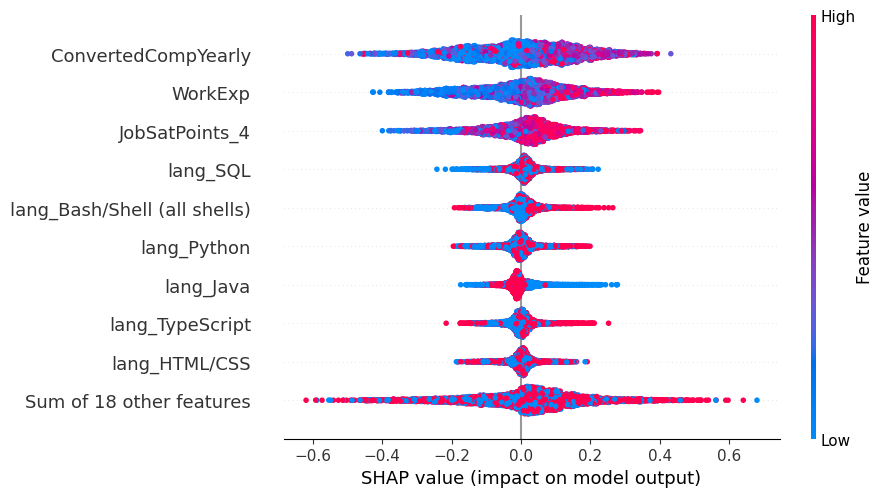

In [181]:
shap.plots.beeswarm(shap_values)

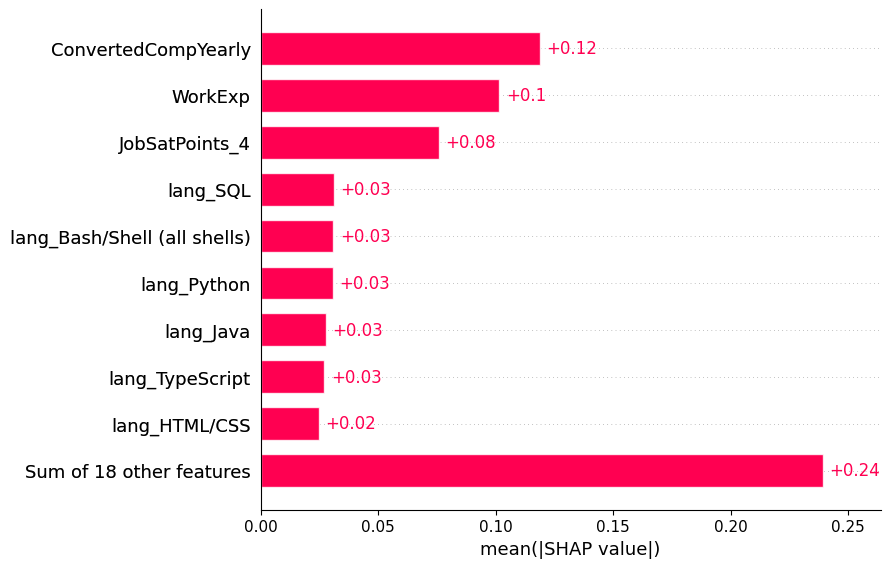

In [182]:
shap.plots.bar(shap_values)

/var/folders/d7/1mxt_jg524d9vgcmpm7h9lp80000gp/T/ipykernel_80769/4117389138.py:1: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, plot_type='violin')


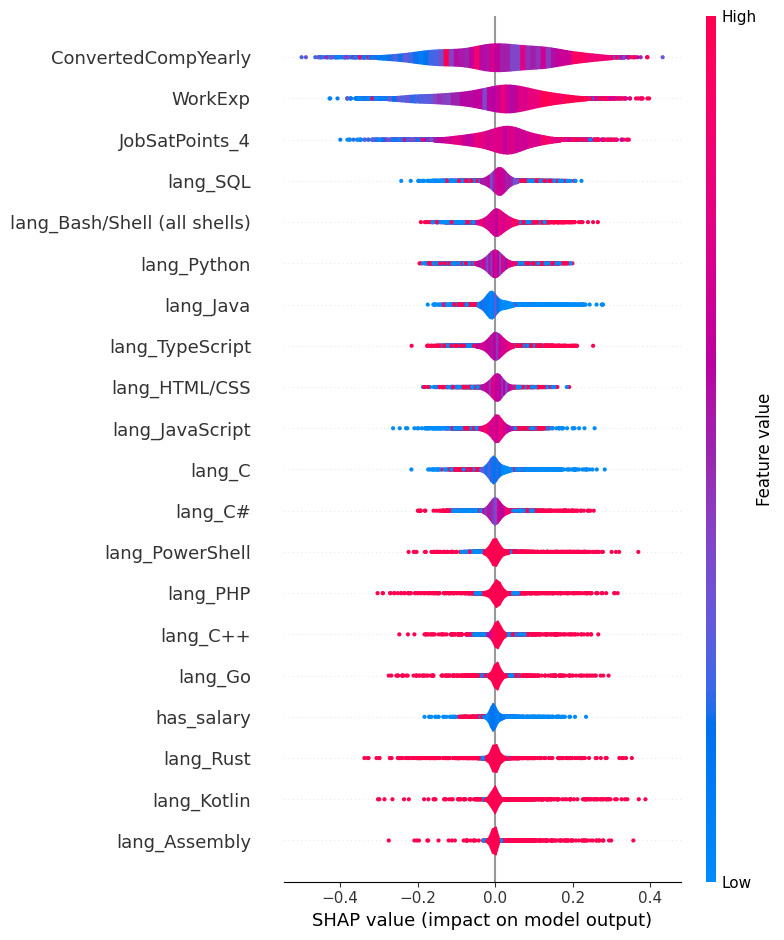

In [183]:
shap.summary_plot(shap_values, plot_type='violin')

So, for our model, the baseline is 75%, which means that we have 75% of chance of beeing satisfied, and the final probability is 0 (not satisfied). 

We have some interesting results in here! Apparently, the less you get, more chance you have to be less satisfied with your job. Also, the less work experience and SAT points you have, you are less prone to be satisfied with your job. Also, if you choose to answer your salary, you are more likely happy too.

We have some findings about the languages too! 
Aparently, Python impacts positevely on job satisfaction - more people that work with Python are satisfied. 

Checking into some individual values (how we do not have clear patterns on the shap plot, it's expected to see different behaviors here!)

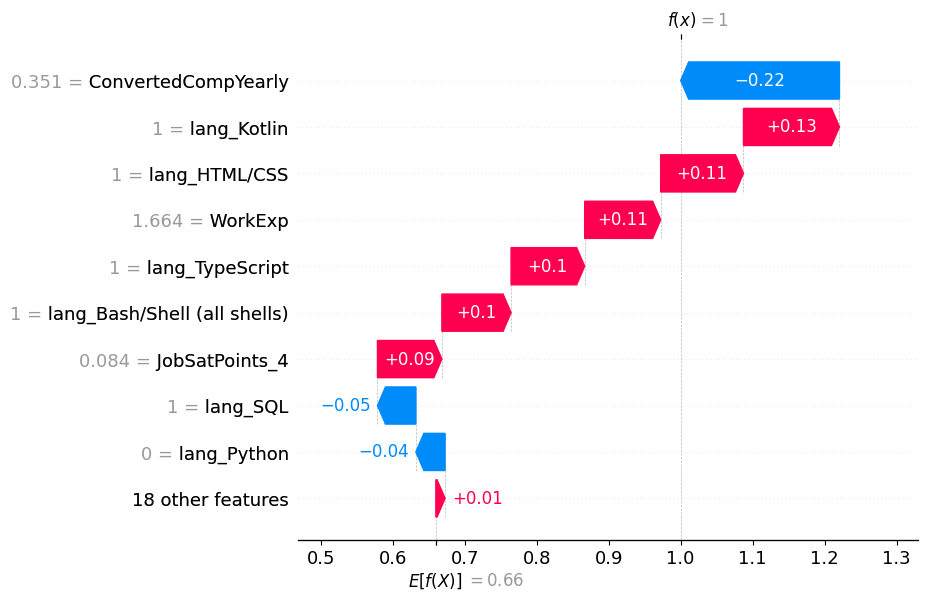

In [184]:
shap.plots.waterfall(shap_values[0])

For this gut, working with and the amount of years that he codes contributes positevely for the satisfaction!

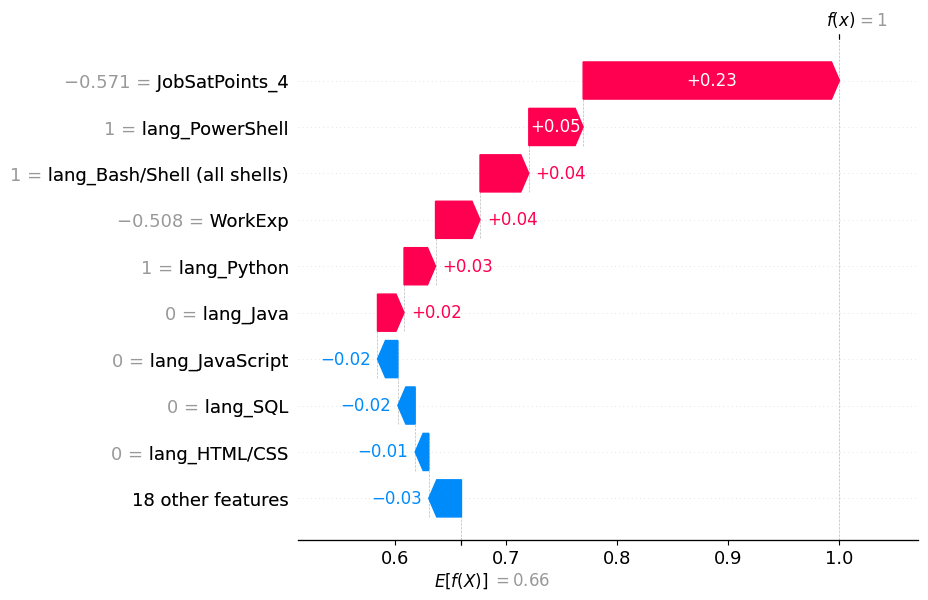

In [185]:
shap.plots.waterfall(shap_values[1])

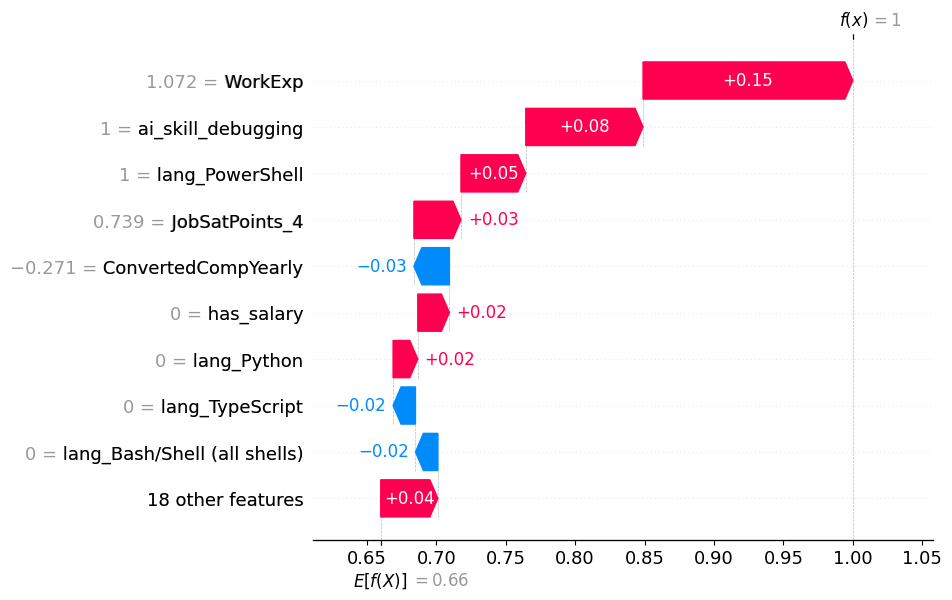

In [186]:
shap.plots.waterfall(shap_values[2])

But for this other two guys... the salary and work experience is contribuiting negatively, as we saw in the major pattern.

Since the features seems to make sense, let's try one final method: oversampling the unbalanced class with SMOTE.

In [58]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

In [59]:
print(xgb_grid.best_params_)

{'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 500, 'scale_pos_weight': np.float64(0.39633507853403144)}


In [60]:

scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()

model = xgb.XGBClassifier(n_estimators=100, max_depth=5, learning_rate=0.1, scale_pos_weight=scale_pos_weight, objective='binary:logistic')
model.fit(X_train, y_train)
preds = model.predict(X_test)

In [61]:
print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred))

0.5935508061492314
0.7122378550570746


In [62]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.30      0.32      0.31      1530
           1       0.72      0.71      0.71      3804

    accuracy                           0.59      5334
   macro avg       0.51      0.51      0.51      5334
weighted avg       0.60      0.59      0.60      5334



Okay, it seems like a pretty bad model overall. Maybe, we did a bad job at choosing our target. Let's try a regression model instead! Let's try to predict the salary a person has based on it's answers.